### Three observations based on the data

#### Observation 1: CNN express negative sentiment in their recent 100 tweets.

#### Observation 2: Fox and BBCWorld, CBS and NYTimes express positive sentiment in their recent 100 tweets.

#### Observation 3: Fox news channel expresses that all is well in United States and BBCWorld reflects the overall growth and progression of the entire world.

In [17]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

consumer_key='9SbkCncv6x35XQRkQ6MKqknF2'
consumer_secret ='oyfLUM56AfZmCxXeMWewjBE6CHDbc8pmxOSag6wfNabBgUZkcx'
access_token='1106479928-WKbDRI6xKQpea3fHlBG2HBcYuMqYKxsrYS7l17s'
access_token_secret='jxbEqjsXLWgLyHtJ10CVWzundr0Guu8RLcK2YdnLRNBZA'

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#Sentiment Intensitiy Analyzer
analyzer = SentimentIntensityAnalyzer()

#Target Account for each Media Source
target_user = ["@BBC","@CBS","@Fox","@CNN","@nytimes"]



In [4]:
# Variables for holding sentiments
sentiments_array = []
counter = 1
# Loop through total 100 tweets
for x in range(5):
    
   
    #loop through each Media Source
    for target in target_user:
        # Get all tweets from home feed
        public_tweets = api.user_timeline(target)
             

        # Loop through all tweets 
        for tweet in public_tweets:
            
            
            # Run vaderSentiment on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
           
        
            # Add sentiments for each tweet into an array
            sentiments_array.append({"Date": tweet["created_at"],
                               "Screen_Name": tweet['user']['screen_name'],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg})
            counter=counter+1

In [5]:
#Generated dataframe containing sentiment for Media Sources
sentiment_analysis= pd.DataFrame(sentiments_array) 
# Mean compound sentiment for recent 100 tweets of @BBC
bbc_mean=np.mean(sentiment_analysis['Compound'])
#display head of df_sentiment_analysis 
sentiment_analysis.head()

,Compound,Date,Negative,Neutral,Positive,Screen_Name
0,0.3291,Sat Dec 02 21:59:04 +0000 2017,0.895,0.0,0.105,BBC
1,0.0000,Sat Dec 02 20:00:05 +0000 2017,1.000,0.0,0.000,BBC
2,0.6369,Sat Dec 02 19:57:21 +0000 2017,0.811,0.0,0.189,BBC
3,0.0000,Sat Dec 02 19:49:59 +0000 2017,1.000,0.0,0.000,BBC
4,0.5093,Sat Dec 02 19:48:25 +0000 2017,0.829,0.0,0.171,BBC


In [6]:
#Save dataframe in to CSV file
sentiment_analysis.to_csv('Sentiment_Analyses_Twitter.csv',header=True, index=False)

In [8]:
#Create dataframes for all the media sources
BBC = sentiment_analysis[sentiment_analysis['Screen_Name'] == 'BBC']
CBS = sentiment_analysis[sentiment_analysis['Screen_Name'] == 'CBS']
FOX = sentiment_analysis[sentiment_analysis['Screen_Name'] == 'fox']
CNN = sentiment_analysis[sentiment_analysis['Screen_Name'] == 'CNN']
nytimes = sentiment_analysis[sentiment_analysis['Screen_Name'] == 'nytimes']

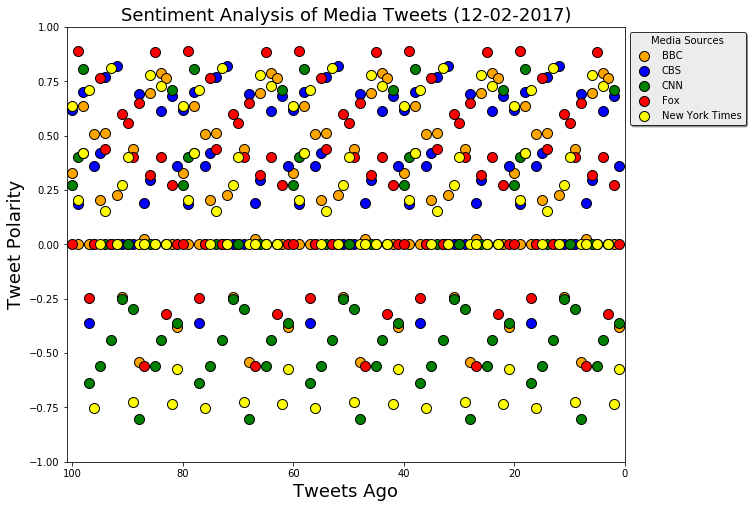

In [18]:
#Plot of Sentiment Analysis of Media Tweets

x_values = np.arange(1,BBC.shape[0]+1)


plt.figure(figsize=(10,8))
plt.scatter(x_values[::-1],BBC['Compound'],s =100,facecolor='orange',edgecolors='black',linewidth=1,alpha=1,label='BBC')
plt.scatter(x_values[::-1],CBS['Compound'],s =100,facecolor='blue',edgecolors='black',linewidth=1,alpha=1,label = 'CBS')
plt.scatter(x_values[::-1],CNN['Compound'],s =100,facecolor='green',edgecolors='black',linewidth=1,alpha=1,color='yellow',label='CNN')
plt.scatter(x_values[::-1],FOX['Compound'],s =100,facecolor='red',edgecolors='black',linewidth=1,alpha=1,color='b',label='Fox')
plt.scatter(x_values[::-1],nytimes['Compound'],s =100,facecolor='yellow',edgecolors='black',linewidth=1,alpha=1,color='green',label='New York Times')

plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'medium', title='Media Sources', bbox_to_anchor=(1, 1))
plt.xlim(0,100)
plt.xlabel('Tweets Ago',fontsize='18')
plt.ylabel('Tweet Polarity',fontsize='18')

now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title('Sentiment Analysis of Media Tweets ({})'.format(now),fontsize=(18))

plt.ylim(-1,1)
plt.xlim(101,0)
plt.savefig('Media_Tweets.png')
plt.show()

In [19]:
#Overall Media Sentiment based on Twitter table
avg_compound = sentiment_analysis.groupby(["Screen_Name"])["Compound"].mean().reset_index()


#rename the columns in df_sentiment_analysis_avg_compound dataframe 
avg_compound.rename_axis({'Screen_Name': 'Media Sources', 'Compound': 'Avg. Compound'},axis=1,inplace=True)

avg_compound

,Media Sources,Avg. Compound
0,BBC,0.198255
1,CBS,0.317310
2,CNN,-0.107480
3,fox,0.273850
4,nytimes,0.116590


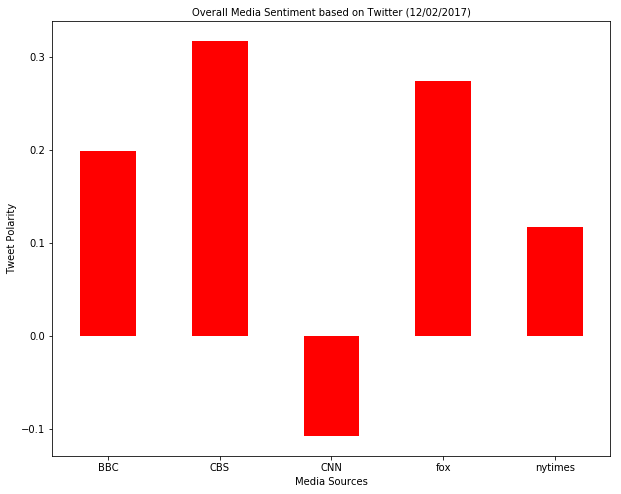

In [20]:
#Plot of overall Media Sentiment Analysis
colorss = ['r', 'y', 'o', 'b', 'g']
sentiment_analysis.groupby(["Screen_Name"])["Compound"].mean().plot(kind='bar',color=colorss)
plt.ylabel('Tweet Polarity',fontsize='10')
plt.xlabel('Media Sources',fontsize='10')
plt.xticks(rotation=0)

now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment based on Twitter ({})'.format(now),fontsize=(10))
plt.savefig("Media_Sentiments.png")
plt.show()